In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np

import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()

In [ ]:
from pandas import read_csv

from google.colab import files
files = files.upload()


def create_dataset(dataset, look_back=12):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		dataX.append( dataset[i:(i + look_back), 0]) 
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


dataframe_train = read_csv('train.txt', usecols=[1], engine='python')  
dataset_train = dataframe_train.values
dataset_train = dataset_train.astype('float32')

dataframe_test = read_csv('test.txt', usecols=[1], engine='python')
dataset_test = dataframe_test.values
dataset_test = dataset_test.astype('float32')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(dataset_train)
test = scaler.fit_transform(dataset_test)

trainX, trainY = create_dataset(train, look_back=12)
testX, testY = create_dataset(test, look_back =12)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Saving test.txt to test.txt
Saving train.txt to train.txt


In [ ]:
print(testX)
print(testY)

[[[0.5801282  0.625      0.30128205 0.15705132 0.         0.08653843
   0.16025639 0.1025641  0.3076923  0.27564108 0.3525641  0.5192307 ]]

 [[0.625      0.30128205 0.15705132 0.         0.08653843 0.16025639
   0.1025641  0.3076923  0.27564108 0.3525641  0.5192307  0.7628205 ]]

 [[0.30128205 0.15705132 0.         0.08653843 0.16025639 0.1025641
   0.3076923  0.27564108 0.3525641  0.5192307  0.7628205  0.798077  ]]

 [[0.15705132 0.         0.08653843 0.16025639 0.1025641  0.3076923
   0.27564108 0.3525641  0.5192307  0.7628205  0.798077   0.49038458]]

 [[0.         0.08653843 0.16025639 0.1025641  0.3076923  0.27564108
   0.3525641  0.5192307  0.7628205  0.798077   0.49038458 0.31089747]]

 [[0.08653843 0.16025639 0.1025641  0.3076923  0.27564108 0.3525641
   0.5192307  0.7628205  0.798077   0.49038458 0.31089747 0.16666663]]

 [[0.16025639 0.1025641  0.3076923  0.27564108 0.3525641  0.5192307
   0.7628205  0.798077   0.49038458 0.31089747 0.16666663 0.30448723]]

 [[0.1025641  0.3

In [ ]:
import keras
from keras.models import Sequential

keras.backend.clear_session()

model = Sequential()
model.add(keras.layers.SimpleRNN(units=4 ))
model.add(keras.layers.Dense(units=1 ))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
model.fit(trainX, trainY, epochs=1000, batch_size=10, verbose=2)
model.summary()

Epoch 1/1000
11/11 - 4s - loss: 0.1754
Epoch 2/1000
11/11 - 0s - loss: 0.1121
Epoch 3/1000
11/11 - 0s - loss: 0.0695
Epoch 4/1000
11/11 - 0s - loss: 0.0433
Epoch 5/1000
11/11 - 0s - loss: 0.0317
Epoch 6/1000
11/11 - 0s - loss: 0.0268
Epoch 7/1000
11/11 - 0s - loss: 0.0246
Epoch 8/1000
11/11 - 0s - loss: 0.0240
Epoch 9/1000
11/11 - 0s - loss: 0.0235
Epoch 10/1000
11/11 - 0s - loss: 0.0230
Epoch 11/1000
11/11 - 0s - loss: 0.0226
Epoch 12/1000
11/11 - 0s - loss: 0.0218
Epoch 13/1000
11/11 - 0s - loss: 0.0216
Epoch 14/1000
11/11 - 0s - loss: 0.0212
Epoch 15/1000
11/11 - 0s - loss: 0.0206
Epoch 16/1000
11/11 - 0s - loss: 0.0201
Epoch 17/1000
11/11 - 0s - loss: 0.0197
Epoch 18/1000
11/11 - 0s - loss: 0.0194
Epoch 19/1000
11/11 - 0s - loss: 0.0191
Epoch 20/1000
11/11 - 0s - loss: 0.0187
Epoch 21/1000
11/11 - 0s - loss: 0.0183
Epoch 22/1000
11/11 - 0s - loss: 0.0178
Epoch 23/1000
11/11 - 0s - loss: 0.0174
Epoch 24/1000
11/11 - 0s - loss: 0.0171
Epoch 25/1000
11/11 - 0s - loss: 0.0167
Epoch 26/

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [ ]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) 
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 9.61 RMSE
Test Score: 23.05 RMSE


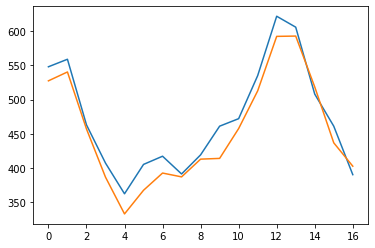

In [ ]:
import matplotlib.pyplot as plt
plt.plot(testY[0])
plt.plot(testPredict)

plt.show()

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
import random
import numpy as np

import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds()

In [ ]:
max_features = 1000
maxlen = 100

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data( num_words=1000)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=100)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=100)


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


In [ ]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(input_dim=1000, output_dim=8 )(inputs)
x = layers.LSTM(units=8)(x)
outputs = layers.Dense(units=1, activation="sigmoid")(x)

keras.backend.clear_session()
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"]) 
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_train, y_train))
print(max(history.history['val_accuracy']))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 8)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 544       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,553
Trainable params: 8,553
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 6s 11ms/step - loss: 0.6387 - accuracy: 0.6053 - val_loss: 0.4144 - val_accuracy: 0.8228
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 0.3999 - accuracy: 0.8264 - val_loss: 0.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 16)          16000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 16)          2112      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 20,241
Trainable params: 20,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 9s 17ms/step - loss: 0.5750 - accuracy: 0.6554 - val_loss: 0.3858 - v

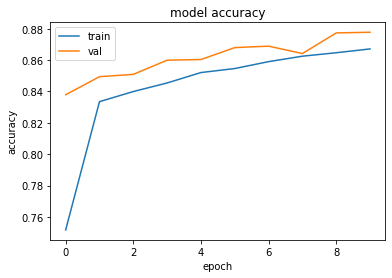

In [ ]:
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds()

max_features = 1000
maxlen = 100

inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(input_dim=1000, output_dim=16 )(inputs)
x = layers.LSTM(units=16,return_sequences=True)(x)
x = layers.LSTM(units=16 )(x)
outputs = layers.Dense(units=1, activation="sigmoid")(x)

keras.backend.clear_session()
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_val, y_val, epochs=10, batch_size=64, validation_data=(x_val, y_val))
print(max(history.history['val_accuracy']))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         128000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 391,297
Trainable params: 391,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 12s 25ms/step - loss: 0.5209 - accuracy: 0.7220 - val_loss: 0.3645 

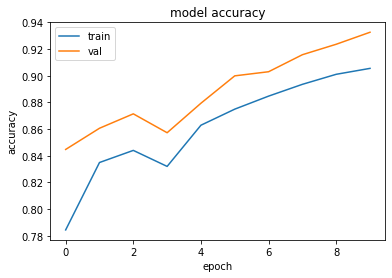

In [ ]:
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds()

max_features = 1000
maxlen = 100

inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(input_dim=1000, output_dim=128 )(inputs)
x = layers.LSTM(units=128, return_sequences=True)(x)
x = layers.LSTM(units=128 )(x)
outputs = layers.Dense(units=1, activation="sigmoid")(x)

keras.backend.clear_session()
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_val, y_val, epochs=10, batch_size=64, validation_data=(x_val, y_val))
print(max(history.history['val_accuracy']))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         128000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 391,297
Trainable params: 391,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 12s 24ms/step - loss: 0.5209 - accuracy: 0.7220 - val_loss: 0.3645 

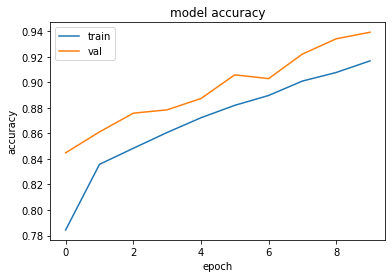

In [ ]:
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds()

max_features = 1000
maxlen = 200

inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(input_dim=1000, output_dim=128 )(inputs)
x = layers.LSTM(units=128, return_sequences=True )(x)
x = layers.LSTM(units=128 )(x)
outputs = layers.Dense(units=1, activation="sigmoid")(x)

keras.backend.clear_session()
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_val, y_val, epochs=10, batch_size=64, validation_data=(x_val, y_val))
print(max(history.history['val_accuracy']))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()